In [64]:
import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import os

(512, 512, 3)


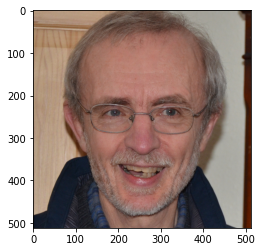

In [89]:
dir = "data"

data = {"Pale":[],
"Intermediate":[],
"Dark":[]}


for file in os.listdir(dir):
    if file[0] == "0":
        data["Pale"].append(tf.io.decode_png(tf.io.read_file(os.path.join(dir, file), name=None)))
    elif file[0] == "1":
        data["Intermediate"].append(tf.io.decode_png(tf.io.read_file(os.path.join(dir, file), name=None)))  
    else:
        data["Dark"].append(tf.io.decode_png(tf.io.read_file(os.path.join(dir, file), name=None)))


data["Pale"], data["Intermediate"], data["Dark"] = np.array(data["Pale"]), np.array(data["Intermediate"]), np.array(data["Dark"])

#On va entrainer sur x% des données et tester sur (100-x)% des données
x = 80

n_p, n_i, n_d = data["Pale"].shape[0], data["Intermediate"].shape[0], data["Dark"].shape[0]

train_pale, train_inter, train_dark = data["Pale"][:m.ceil((x/100)*n_p)], data["Intermediate"][:m.ceil((x/100)*n_i)], data["Dark"][:m.ceil((x/100)*n_d)]

test_pale, test_inter, test_dark = data["Pale"][m.ceil((x/100)*n_p):], data["Intermediate"][m.ceil((x/100)*n_i):], data["Dark"][m.ceil((x/100)*n_d):]

#plt.imshow(train_pale[0])


In [43]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 512
IMG_HEIGHT = 512

In [90]:
#cropped_image = tf.image.random_crop(image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    return image

def random_jitter(image):
    # resizing to 286 x 286 x 3
    #image = tf.image.resize(image, [286, 286],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    # randomly cropping to 256 x 256 x 3
    #image = random_crop(image)

    # random mirroring
    image = tf.image.random_flip_left_right(image)

    return image

def preprocess_image_train(image, label):
    image = random_jitter(image)
    image = normalize(image)
    return image
    
def preprocess_image_test(image, label):
    image = normalize(image)
    return image




In [ ]:
train_horses = train_horses.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

train_zebras = train_zebras.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_horses = test_horses.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_zebras = test_zebras.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)
